In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


# SMOTETomek gives a warning about numpy.core.umath_tests is an internal NumPy module and should not be imported. 
# It will be removed in a future NumPy release.
from numpy.core.umath_tests import inner1d
from imblearn.combine import SMOTETomek



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# xgboost model
from xgboost import XGBClassifier
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV



from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("../2_Data_Clean/hr/train_data.csv")

X = train_data.drop(["Class"], axis = 1)
y = train_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 7)

sampler = SMOTETomek()
X_resample, y_resample = sampler.fit_sample(X_train, y_train)

In [4]:
pipe = make_pipeline(StandardScaler(),XGBClassifier())
pipe

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [6]:
from scipy.stats import randint, uniform

param_grid = {
    'xgbclassifier__booster':['gbtree', 'gblinear','dart'],
    'xgbclassifier__n_estimators':randint(100,1000),
    'xgbclassifier__gamma':uniform(0,10),
    "xgbclassifier__learning_rate":uniform(0,1),
    'xgbclassifier__nthread':[1],
    'xgbclassifier__max_depth':randint(1,10)    
}

random_cv = RandomizedSearchCV(estimator = pipe,param_distributions = param_grid, cv =10, error_score = 0,
                               n_iter = 10 , scoring = 'f1',return_train_score=True, n_jobs = 2)

In [7]:
random_cv.fit(X_resample, y_resample)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3...       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'xgbclassifier__booster': ['gbtree', 'gblinear', 'dart'], 'xgbclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcd71c5de10>, 'xgbclassifier__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcd71c5df98>, 'xgbclassifier__learni... 'xgbclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcd71c975f8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(33,0.5,'True value')

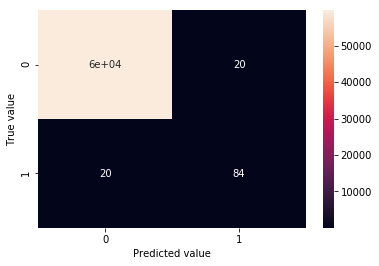

In [8]:
y_pred = random_cv.predict(X_test)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

sns.heatmap(cm, annot = True)
plt.xlabel("Predicted value")
plt.ylabel("True value")

In [11]:
random_cv.best_params_

{'xgbclassifier__booster': 'gbtree',
 'xgbclassifier__gamma': 1.8605362065650377,
 'xgbclassifier__learning_rate': 0.3997006807753447,
 'xgbclassifier__max_depth': 6,
 'xgbclassifier__n_estimators': 872,
 'xgbclassifier__nthread': 1}

In [12]:
random_cv.best_score_

0.999794757514945

In [9]:
print("The total time used is {} hrs.".format(random_cv.cv_results_['mean_fit_time'].sum()*10/3600))

The total time used is 13.385711493227216 hrs.


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test, y_pred = y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     59706
          1       0.81      0.81      0.81       104

avg / total       1.00      1.00      1.00     59810



In [13]:
random_cv.cv_results_

{'mean_fit_time': array([  51.07979021,   19.91363018, 1666.36353304,  123.48247142,
        1269.49391415,   47.671738  ,  178.95828145,  308.2051327 ,
         183.08929167,  970.59835474]),
 'std_fit_time': array([7.00439228e-01, 3.93608512e-02, 4.29707748e+01, 3.05107546e+00,
        4.58978133e+01, 2.04082391e-01, 1.62355289e+00, 7.67181840e+00,
        5.82570518e+00, 3.92260664e+01]),
 'mean_score_time': array([0.02039251, 0.01748183, 0.27242322, 0.10613012, 0.16927786,
        0.0176816 , 0.19540706, 0.10915537, 0.06055026, 0.17970951]),
 'std_score_time': array([0.00346486, 0.00077994, 0.02415778, 0.00729808, 0.01285282,
        0.00088089, 0.00852675, 0.00866658, 0.00294003, 0.01145669]),
 'param_xgbclassifier__booster': masked_array(data=['gblinear', 'gblinear', 'dart', 'dart', 'gbtree',
                    'gblinear', 'gbtree', 'dart', 'gbtree', 'gbtree'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        